In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import chi2
import pandas as pd
import seaborn as sns

## A Little Statistics

# Problem 1

# The Normal Distribution is described by:
$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$
or probability of x given $(\mu, \sigma)$

A normal distribution is a standard bell curve where it is centered at $\mu$ its width is proportional to the $\sigma$ parameter.

In [2]:
mu=178.4
sigma=5

In [3]:
def my_gauss():
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(5, 3.75))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

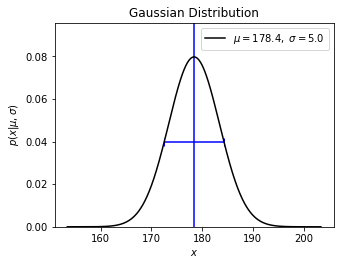

In [4]:
my_gauss()

In [5]:
gaussCDF = norm(mu, sigma).cdf

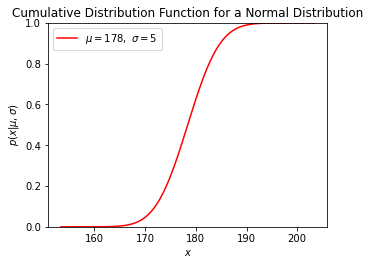

In [6]:
def gauss_cdf():
    fig, ax = plt.subplots(figsize=(5, 3.75))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gaussCDF(x)
    plt.plot(x, y, ls='-', c='red', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()
gauss_cdf()

In [7]:
#Part B, CDF Test
sigma_test1 = stats.norm.cdf(1.8)
print(sigma_test1)

sigma_test2 = stats.norm.cdf(1.3)
print(sigma_test2)

0.9640696808870742
0.9031995154143897


Values match the z-table from wikipedia

In [8]:
#Part C, PPF Test
prob_test1 = stats.norm.ppf(sigma_test1)
print(prob_test1)

prob_test2 = stats.norm.ppf(sigma_test2)
print(prob_test2)

1.8000000000000003
1.3000000000000003


Got the desired sigma values but they're negative.

# Problem 2

## Chi-squared distribution

Chi-squared  is used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal. 
Mathematically it is expressed as $$\chi^2 \equiv \sum_{i=1}^N \left({x_i-\mu \over \sigma_i}\right)^2,$$
Chi-squared is useful for testing the accuracy of the fit when analyzing data.

In [38]:
chix=random.chisquare(df=1,size=100000)
df=1


3.Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'

A. Select a value for your hypothetical measurement

B. Clearly state the statistical question you want to ask in words

C. Convert your word question into a mathematical integral

D. Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. cdf() and icdf() in MatLab; .cdf() and .ppf() in scipy).

E. Convert your probability into an equivalent 'sigma'

Part 3, Item A I will select my value to be 25

Part3, Item B The question then becomes: what sigma value from a normal data distribution would give the same probability when looking for the probability that you detect a signal that has a value of 25 or greater?

Part3, Item C First, you take the integral of the chi-squared distribution from the selected value (25) to infinity to find that probability.

Next, you take an integral from an unknown sigma value to infinity under the assumption of a normal distribution of data. Given the answer to the first integral, you will be able to compute the sigma value.

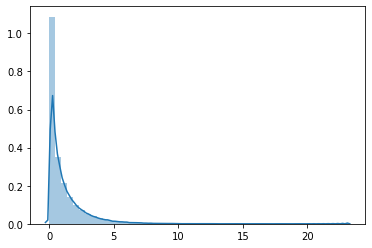

In [39]:
sns.distplot(chix)  
plt.show()

In [41]:
sigma_test3 = 1-stats.chi2.cdf(2, df=1)
print(sigma_test3)

sigma_test4 = 1-stats.chi2.cdf(2.5, df=1)
print(sigma_test4)

0.15729920705028488
0.11384629800665769


In [42]:
prob_test3 = stats.norm.ppf(sigma_test3)
print(prob_test3)

prob_test4 = stats.norm.ppf(sigma_test4)
print(prob_test4)

-1.0056199694085208
-1.2063239772954635


The results from the chi-squared integrals show one would need to go a very far distance to get to their respective probabilities. It is negative because the probability is so small, and you assume +infinity is the upper integral bound,which means you must come past zero to arrive at the sigma value that will encompass enough data.

In [43]:
sigma_test = 1-stats.chi2.cdf(25, df=1)
print(sigma_test)

5.733031437360481e-07


In [44]:
prob_test = stats.norm.ppf(sigma_test)
print(prob_test)

#Seems that when given sigma is small the probability becomes infinite.

-4.864648093137376


## Non-Continuous Distributions

## Poisson Distribution

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.

$$ P(k \mid \lambda) = e^{-\lambda}\frac{\lambda^k}{k!} $$
where $k$ is the number of events and $\lambda$ is the mean number of events.

In [11]:
data_poisson1 = poisson.rvs(mu=3, size=100000)

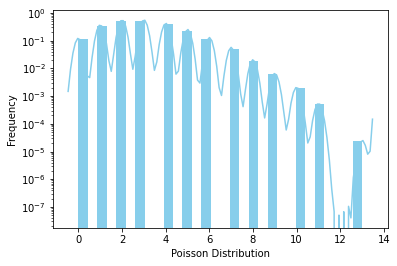

In [15]:
ax1 = sns.distplot(data_poisson1,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax1.set(xlabel='Poisson Distribution', ylabel='Frequency')
ax1.set_yscale('log')

In [17]:
data_poisson2 = poisson.rvs(mu=5, size=1000)

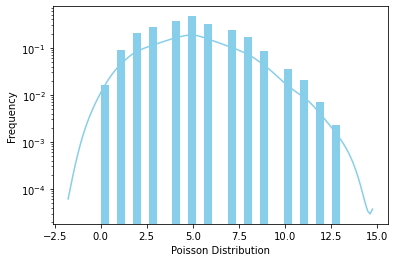

In [18]:
ax2 = sns.distplot(data_poisson2,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax2.set(xlabel='Poisson Distribution', ylabel='Frequency')
ax2.set_yscale('log')

In [21]:
data_poisson3 = poisson.rvs(mu=3, size=100)

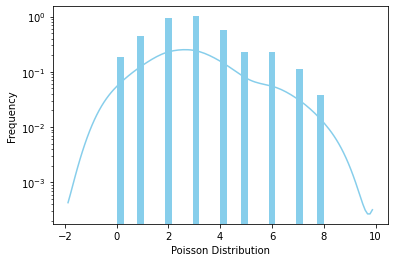

In [22]:
ax3 = sns.distplot(data_poisson3,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax3.set(xlabel='Poisson Distribution', ylabel='Frequency')
ax3.set_yscale('log')

By graphing the Poisson Distribution with the y-axis set on a logarithmic scale it becomes semi-Gaussian in shape.

Statistical question: What is the likelihood that I will be at or around a sigma greater than 4?

In [36]:
#Test run for the third Poisson graph
sigma_test5 = stats.poisson.cdf(4, mu=3, loc=0)
print('the probability is')
print(sigma_test5)

the probability is
0.8152632445237722


In [38]:
prob_test5 = stats.poisson.pmf(sigma_test5, mu=3)
print("This number represents the sigma value that would give an equal probability if the data was normally distributed.")
print(prob_test5)

This number represents the sigma value that would give an equal probability if the data was normally distributed.
0.0


There is a high probability of being located around 4 as seen in the third Poisson graph with a $\mu$ of 3 as shown by getting a sigma of 0. One would not have to travel very far to get that sigma value.

Discrete distributions can and most likely will produce parameters that are not discrete simply because of the way the numbers can be manipulated. To look at the example described above, and Poisson distribution can have a mean that is not a discrete value because it takes the sum of n integers and divides them by n. To further communicate this idea, think of a discrete distribution comprised of 3 values, 9, 7, and 6, their sum is 22 and 22 divided by 3 is 7.33333, in othe words, not a discrete value. So the data, sigma, and probilities will all be confined to discrete values, and things like the mean, and standard deviation will be continuous.